In [1]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
from skimage.io import imshow

In [3]:
image_path='D:\Autoencoders\images\\'

In [4]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

In [5]:
gpu_devices[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [6]:
train_datagenerator=ImageDataGenerator(rescale=1./255)
train_data=train_datagenerator.flow_from_directory(image_path,target_size=(256,256),batch_size=1920,class_mode=None)

Found 1920 images belonging to 1 classes.


In [ ]:
for image in (train_data[0]):
        lab=rgb2lab(image)
        print('L')
        imshow(lab[:,:,0])
        print('-'*45)
        break


In [ ]:
for image in (train_data[0]):
        lab=rgb2lab(image)
        print('A')
        imshow(lab[:,:,1])
        print('-'*45)
        break


In [ ]:
for image in (train_data[0]):
        lab=rgb2lab(image)
        print('B')
        imshow(lab[:,:,2])
        print('-'*45)
        break


In [7]:
%%time
x=[]
y=[]
for i,image in enumerate(tqdm(train_data[0])):
        lab=rgb2lab(image)
        x.append(lab[:,:,0])
        y.append(lab[:,:,1:]/128)

100%|██████████████████████████████████████████████████████████████████████████████| 1920/1920 [00:25<00:00, 76.21it/s]

Wall time: 29.9 s


In [8]:
x=np.array(x)

y=np.array(y)
x=x.reshape(x.shape+(1,))
print((x.shape,y.shape))

((1920, 256, 256, 1), (1920, 256, 256, 2))


# ENCODER

In [9]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

# DECODER

In [10]:
#Note: For the last layer we use tanh instead of Relu. 
#This is because colorizing the image in this layer uses 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       2

In [11]:
history=model.fit(x,y,validation_split=0.1, epochs=150, batch_size=10)
model.save('model/colorize_autoencoder.model')

Epoch 1/150
173/173 [==============================] - 23s 130ms/step - loss: 0.0544 - accuracy: 0.6208 - val_loss: 0.0163 - val_accuracy: 0.6457
Epoch 2/150
173/173 [==============================] - 19s 111ms/step - loss: 0.0138 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 3/150
173/173 [==============================] - 19s 112ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 4/150
173/173 [==============================] - 19s 113ms/step - loss: 0.0137 - accuracy: 0.6261 - val_loss: 0.0164 - val_accuracy: 0.6457
Epoch 5/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 6/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 7/150
173/173 [==============================] - 20s 114ms/step - loss: 0.0138 - accuracy: 0.6248 - val_loss: 0.0162 -

Epoch 57/150
173/173 [==============================] - 20s 115ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 58/150
173/173 [==============================] - 20s 116ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0163 - val_accuracy: 0.6457
Epoch 59/150
173/173 [==============================] - 20s 116ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 60/150
173/173 [==============================] - 20s 115ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 61/150
173/173 [==============================] - 20s 115ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 62/150
173/173 [==============================] - 20s 115ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 63/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0

173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 113/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 114/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 115/150
173/173 [==============================] - 19s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0163 - val_accuracy: 0.6457
Epoch 116/150
173/173 [==============================] - 19s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 117/150
173/173 [==============================] - 20s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 - val_accuracy: 0.6457
Epoch 118/150
173/173 [==============================] - 19s 113ms/step - loss: 0.0137 - accuracy: 0.6260 - val_loss: 0.0162 -

In [ ]:
42637987_866635edf6

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


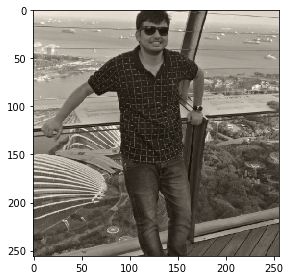

In [13]:
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb
###########################################################
#Load saved model and test on images.
#colorize_autoencoder300.model is trained for 300 epochs
#

model = tf.keras.models.load_model('model/colorize_autoencoder.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

img1=img_to_array(load_img('images/images_dir/me.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))


